# Введение в анализ данных
## Домашнее задание 3. 


**Правила:**

* Дедлайн **17 мая 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить на почту `mipt.stats@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 3"`. Квадратные скобки обязательны.
* Прислать нужно ноутбук и его pdf-версию (без архивов). Названия файлов должны быть такими: `3.N.ipynb` и `3.N.pdf`, где `N` -- ваш номер из таблицы с оценками. *pdf-версию можно сделать с помощью Ctrl+P. Пожалуйста, посмотрите ее полностью перед отправкой. Если что-то существенное не напечатается в pdf, то баллы могут быть снижены.*
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код при проверке запускаться не будет.

**Баллы за задание:**

Легкая часть (достаточно на "хор"):

* Задача 1 -- 3 балла

Сложная часть (необходимо на "отл"):

* Задача 2 -- 2 балла
* Задача 3 -- 10 баллов
* Задача 4 -- 4 балла

Баллы за разные части суммируются отдельно, нормируются впоследствии также отдельно. Иначе говоря, 1 балл за легкую часть может быть не равен 1 баллу за сложную часть.

## Легкая часть

Перед выполнением этой части настоятельно рекомендуется посмотреть ноутбук с лекции про закон больших чисел.

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*.

**a).** Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$


In [83]:
import random
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
n = 300    # count of ksi in sample
m = 500    # count of samples
samples = sps.expon.rvs(size=(m, n))

cum_means = samples.cumsum(axis=1)

z = (cum_means - (np.arange(n) + 1))/((np.arange(n) + 1)**(1/2))

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

(0.0, 300.0)

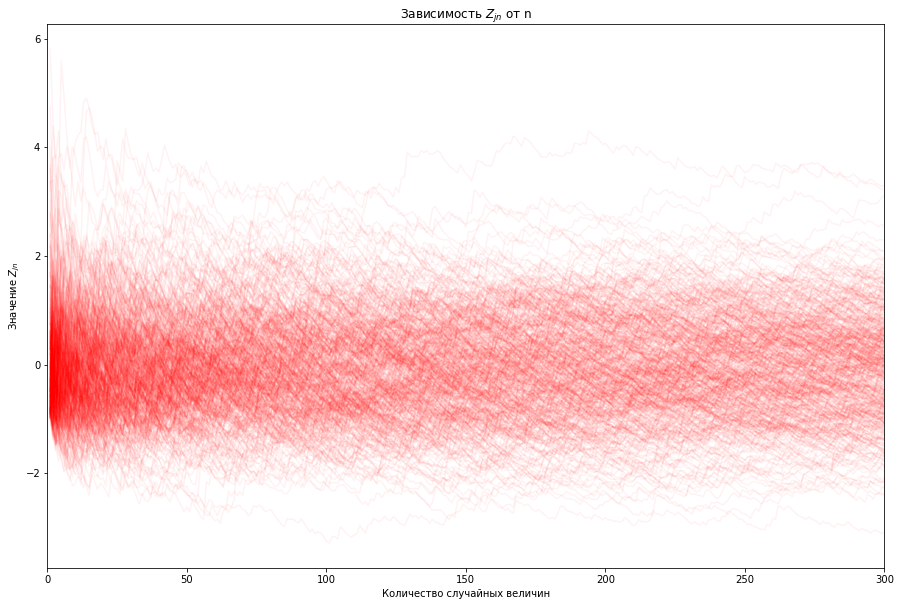

In [85]:
plt.figure(figsize=(15, 10))
for i in range(m):
    plt.plot(np.arange(n) + 1, z[i], color='red', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{jn}$')
plt.title('Зависимость $Z_{jn}$ от n')

plt.xlim((0, n)) # limit

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$ (ее тоже постройте на том же графике)? Не забудьте сделать легенду.

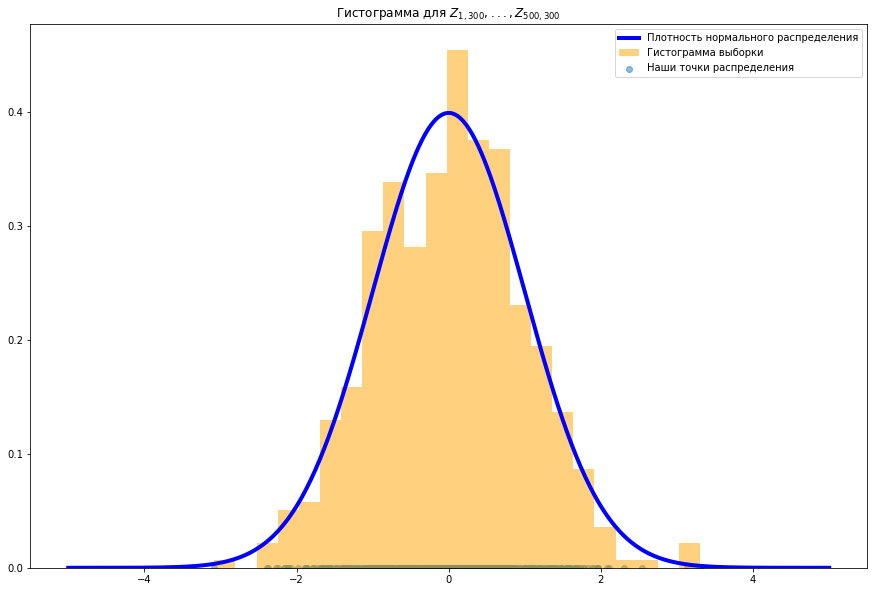

In [86]:
plt.figure(figsize=(15, 10))

plt.scatter(
    z[:, n-1],
    np.zeros(m),
    alpha=0.5,
    label='Наши точки распределения'
)

plt.hist(
    z[:, n-1],
    bins=23,
    alpha=0.5,
    density=True,
    color='orange',
    label = 'Гистограмма выборки'
)

plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    color='blue',
    linewidth=4,
    label='Плотность нормального распределения'
)


plt.title('Гистограмма для $Z_{1,300}, ..., Z_{500,300}$')
plt.legend()
plt.show()

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

(0.0, 300.0)

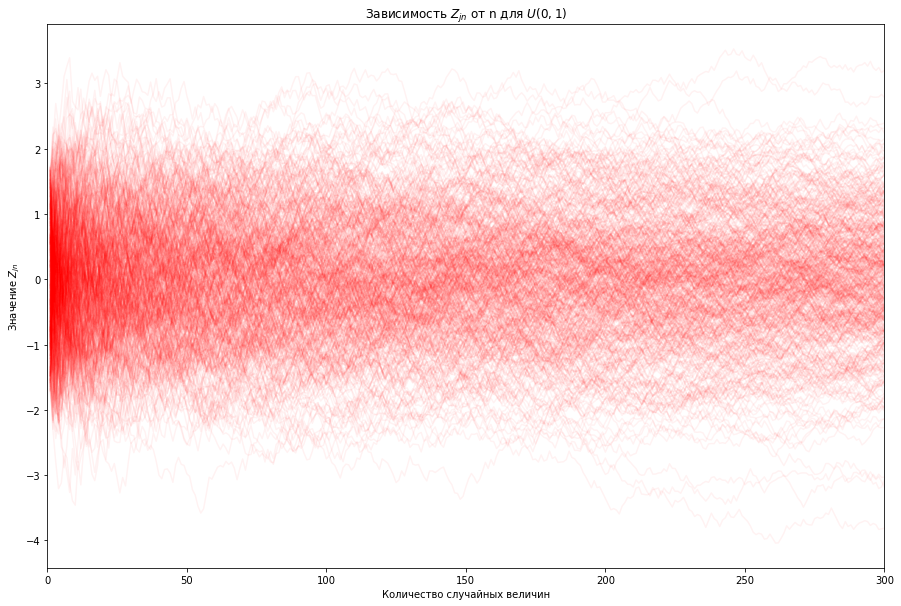

In [87]:
samples_norm = sps.uniform(0, 1).rvs(size=(m, n))

samples_norm_means = samples_norm.cumsum(axis=1)

z_u = (samples_norm_means - (np.arange(n) + 1) * sps.uniform(0, 1).mean())/ \
(((np.arange(n) + 1) * sps.uniform(0, 1).var())**(1/2))

plt.figure(figsize=(15, 10))
for i in range(m):
    plt.plot(np.arange(n) + 1, z_u[i], color='red', alpha=0.05)
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{jn}$')
plt.title('Зависимость $Z_{jn}$ от n для $U(0, 1)$')

plt.xlim((0, n))

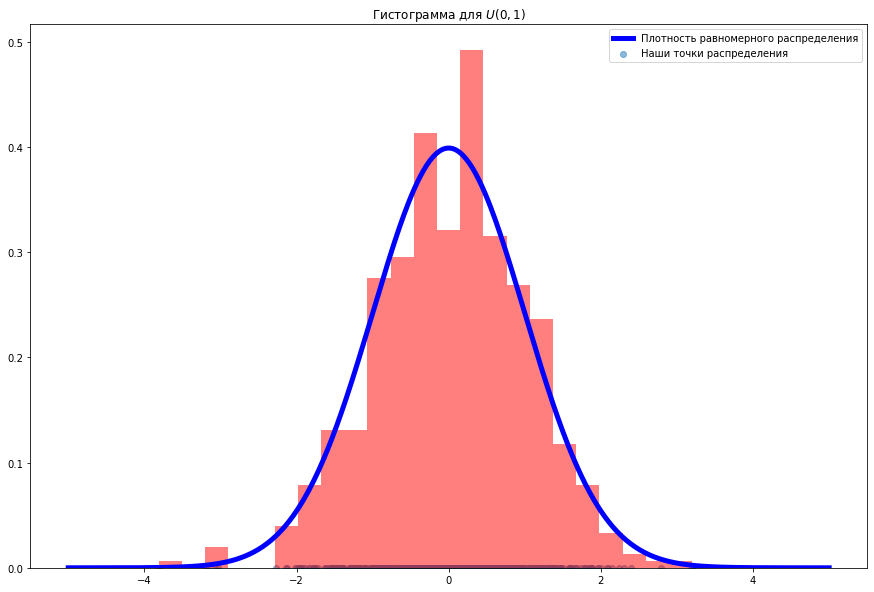

In [88]:
plt.figure(figsize=(15, 10))

plt.scatter(
    z_u[:, n-1],
    np.zeros(m),
    alpha=0.5,
    label='Наши точки распределения'
)
plt.hist(
    z_u[:, n-1],
    bins=23,
    alpha=0.5,
    density=True,
    color='red',
)
plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    color='blue',
    linewidth=5,
    label='Плотность равномерного распределения'
)

plt.title('Гистограмма для $U(0, 1)$')
plt.legend()
plt.show()

(0.0, 300.0)

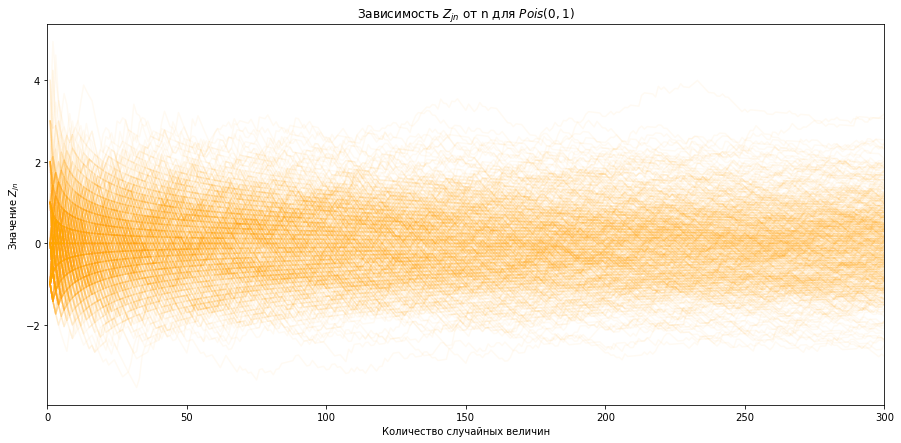

In [89]:
samples_pois = sps.poisson(mu=1).rvs(size=(m, n))

samples_pois_means = samples_pois.cumsum(axis=1)

z_pois = (samples_pois_means - (np.arange(n) + 1) * sps.poisson(mu=1).mean())/ \
(((np.arange(n) + 1) * sps.poisson(mu=1).var())**(1/2))

plt.figure(figsize=(15, 7))
for i in range(m):
    plt.plot(np.arange(n) + 1, z_pois[i], color='orange', alpha=0.05)
    
plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{jn}$')
plt.title('Зависимость $Z_{jn}$ от n для $Pois(0, 1)$')

plt.xlim((0, n))

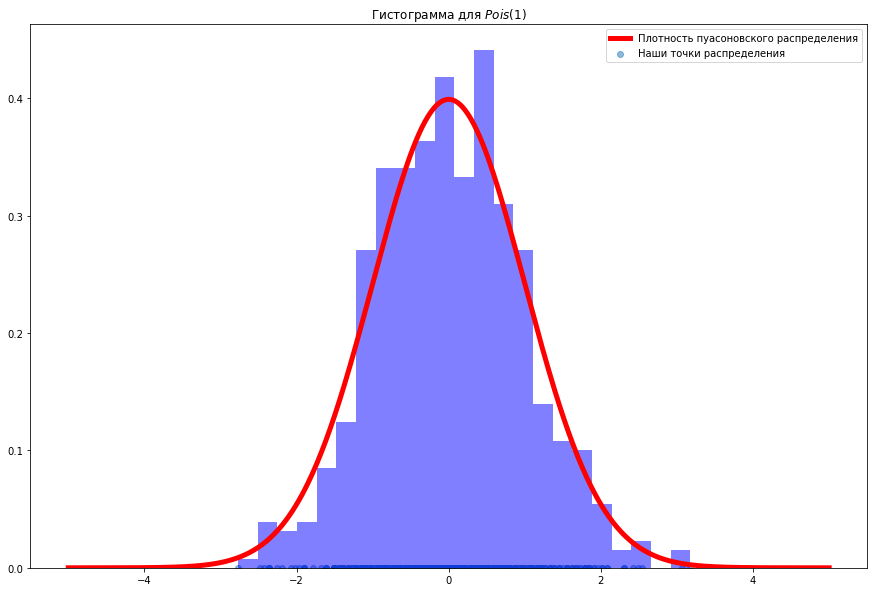

In [90]:
plt.figure(figsize=(15, 10))

plt.scatter(
    z_pois[:, n-1],
    np.zeros(m),
    alpha=0.5,
    label='Наши точки распределения'
)
plt.hist(
    z_pois[:, n-1],
    bins=23,
    alpha=0.5,
    density=True,
    color='blue',
)
plt.plot(
    grid,
    sps.norm(0, 1).pdf(grid),
    color='red',
    linewidth=5,
    label='Плотность пуасоновского распределения'
)

plt.title('Гистограмма для $Pois(1)$')
plt.legend()
plt.show()

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** мы можем явно наблюдать верность ЦПТ. Сумма большого (сильно большого) количества независимых случайных величин имеет распределение достаточно близкое к нормальному.

## Сложная часть

### Задача 2.

В этой задаче нужно визуализировать *закон повторого логарифма*.

*a).* Пусть $\xi_1, ..., \xi_n$ --- независимые случайные величины из равномерного распределения на $\{-1, 1\}$. Согласно закону повторного логарифма траектория суммы $S_n = \xi_1 + ... + \xi_n$ при увеличении $n$ с вероятностью 1 бесконечное число раз пересекает границу $\pm (1-\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$, и лишь конечное число раз пересекает границу $\pm (1+\varepsilon)\sqrt{2n\log\log n}, \varepsilon>0$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов сумму в зависимости от размера набора.

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Bern(1/2)$. По каждому из них посчитайте среднее $S_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумму по первым $n$ величинам $j$-го набора.

In [91]:
n = 300
m = 500

samples_bern = (sps.bernoulli(0.5).rvs(size=(m, n))- 0.5) * 2
samples_bern_means = samples_bern.cumsum(axis=1)

Для каждого $j$ нанесите на один график зависимость $S_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`.

(0.0, 300.0)

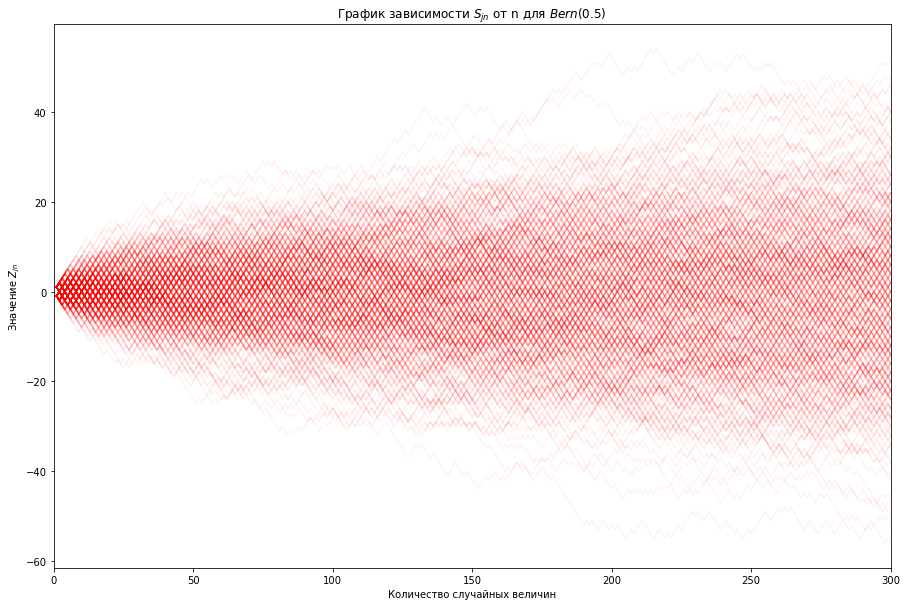

In [92]:
plt.figure(figsize=(15, 10))

for i in range(m):
    plt.plot(np.arange(n) + 1, samples_bern_means[i], color='red', alpha=0.05)

plt.xlabel('Количество случайных величин')
plt.ylabel('Значение $Z_{jn}$')
plt.title('График зависимости $S_{jn}$ от n для $Bern(0.5)$')

plt.xlim((0, n))

Для трех различных $n$ по набору случайных величин $S_{1,n}, ..., S_{500,n}$ постройте графих доли тех величин, которые выходят за порог $\pm с\sqrt{2n\log\log n}$ при изменении $c$ от 0.5 до 1.5. Графики стройте в строчку с помощью `plt.subplot`.

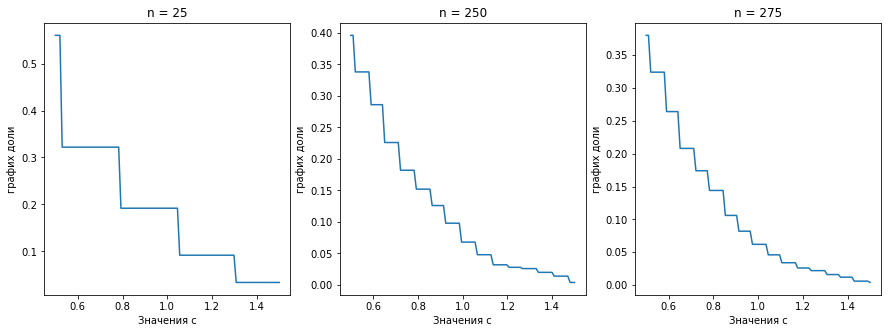

In [93]:
plt.figure(figsize=(15, 5))

for n, i in zip([25, 250, 275], range(1, 4)):
    plt.subplot(1, 3, i)
    c = np.linspace(0.5, 1.5, 100)
    s_in = samples_bern_means[:, n]
#    x = np.array(map(lambda c_j: (abs(s_in) > c_j * ((2 * n * np.log(np.log(n))) ** 0.5)).sum(), c)) / 500
    x = np.array(list(map(lambda c_j: (abs(s_in) > c_j * ((2 * n * np.log(np.log(n))) ** 0.5)).sum(), c))) / 500
    
    plt.title('n = {}'.format(n))
    plt.plot(c, x)
    plt.xlabel('Значения c')
    plt.ylabel('графих доли')

Сделайте вывод о смысле закона повторного логарифма. Подтверждают ли сделанные эксперименты теоретические свойства?

**Вывод:** Предоставленные данные подтвержают теоритические предположения.Это одна из предельных теорем теории вероятностей, перекликающееся с законом больших чисел.

---
### Задача 3.

В этой задаче нужно проявить и визуализировать свое *творчество*.

Общий принцип:
* Придумать какую-либо цель исследования, поставить вопрос или гипотезы
* Собрать необходимый набор данных "руками" или с помощью кода.
* Сделать простой анализ полученного датасета в этом ноутбуке.
* Сделать вывод.

Основные требования к данным:
* Все собранные данные необходимо представить в виде одной или нескольких таблиц формата `csv` или `xls`. Эти файлы должны легко считываться при помощи `pandas`. **Все эти файлы необходимо прислать вместе с решением на почту.**
* По строкам таблиц должны располагаться исследуемые объекты, например, люди. Одному объекту соответствует одна строка. По столбцам должны располагаться свойства объекта, например, пол, возраст.
* При сборе данных "руками" вы самостоятельно выбираете количество исследуемых объектов исходя из времени, которое необходимо на это потратить. Рассчитываемое время -- 2-3 часа.
* При сборе данных с помощью кода ограничивайте себя только размером доступных данных, которые можно скачать за 2-3 часа или 10000 объектами.
* Во всех случаях количество исследуемых объектов должно быть **не менее 30**. Количество свойств объектов -- **не менее двух**.

Основные требования к исследованию:
* Заранее необходимо четко определиться с вопросом, который вы хотите исследовать. Например, "хочу исследовать взаимосвязь двух свойств".
* При анализе необходимо провести полную визуализацию данных. Все графики должны быть оформлены грамотно.
* Подумайте, как вы можете применить полученные математические знания по курсу теории вероятностей для анализа собранных данных?
* Примените их если это возможно. Например, у вас не должно возникнуть проблем с тем, чтобы посчитать среднее, подкрепив корректность такого подхода соответствующей теоремой. А взаимосвязь двух свойств вы вряд ли сейчас сможете оценить по данным.
* Полноценные выводы.

Ниже перечислены некоторые идеи, но вы можете придумать свою. 
* Исследование характеристик и вкусовых качеств овощей/фруктов/ягод. В качестве свойств можно рассмотреть высоту объекта, радиус в разрезе, цвет, тип, вкусовую оценку, дату покупки, дату употребления.
* Исследование характеристик листьев деревьев. В качестве свойств можно рассмотреть длину и ширину листа, цвет, тип растения.
* Характеристики товаров в интернет-магазине, включая рейтинг.
* Музыкальные исполнители и песни. В качестве свойств можно рассмотреть рейтинг артиста, количество треков, количество ремиксов, количество коллабораций.
* Кинофильмы, мультфильмы, аниме.
* Анализ новостных лент. На сайте https://www.similarweb.com/ можно посмотреть статистику различных издательств, на основе чего придумать правило оценки степени "доверия" изданию. Исследуйте, какие новости первым публикует издание с наибольшим значением доверия? Опросите знакомых об отношении к этим новостям.
* Анализ данных пабликов ВК.
* Анализ схожести сайтов или блогов по частоте упоминания какой-либо темы.

Проведенное мною исследование не совсем то чтотребовалось в задании. Но я решил его провести, так как тема мне очень интересна и я хотел бы в дальшем развить эту тему исследования для более точно модели.

В приведенном эксперименте я хочу сэмулировать небольшую можель рынка. Созданим потребителей и производителей.

* потребители зарабатывают деньги и им необходиом покупать продукт.
* фабрики производят продукт и продают его.

У нас будет только один продукт, все потребители покупают только его. и все производители производят только его.

* потребители зарабытывают разное колическо денег, соответственно у них разная покупательская способность.
* производители производят продукты разного качества и цены, все как в обычной жизни, чем выше цена тем лучше качество.

Симуляция будет иметь несколько иттераций (время), в каждую иттерацию происходит куплю/продажа, после чего фабрики вкладываются в развитие товара. Товар может как улучшиться, так и ухудшиться.

Создадим жителей и фабрики.

*... увы, но но садиться за два дня до дедлайна за эту задачу было апрометчиво)
В итоге что-то стоящее показать нечего, только наброски и начало разработки модели.
Я продолжу это исследование, так как мне это интересно, спасибо вам что заставили сесть и начать это кодить, старт положен, дальше дело за малым)*

---
### Задача 4.

Некоторые студенты второго курса ФИВТ понадеявшись на отмену учета посещения занятий по курсу "Введение в анализ данных" решили дудосить гугл-опросники. Команда "Физтех.Статистики" без особых проблем смогла разделить результаты опроса на спамовые и настоящие, а также установить круг подозреваемых. Теперь это предлагается сделать вам как начинающим аналитикам.

Вам выдаются результаты нескольких опросов. 
1. Необходимо для каждой строки понять, является ли результат спамовым или настоящим. Результаты анализа необходимо прислать на почту вместе с решением.
2. Какими общими характеристиками обладают спамовые записи? Как часто они происходят?

In [219]:
import pandas as pd

Посмотрим на данные посещаемости за март.

In [227]:
data_march = pd.read_excel('Данные к ДЗ 3/Лекция 5 марта.xlsx')
data_march.columns = ['timestamp', 'group', 'raw_name_list']

data_march.head()

,timestamp,group,raw_name_list
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений
1,2020-03-05 19:17:02.696,825,Чернов Андрей
2,2020-03-05 19:17:03.071,811,Чуров Дима
3,2020-03-05 19:17:03.192,824,Жуков Павел
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий


А так же посмотрим на данные за апрель.

In [228]:
data_april = pd.read_excel('Данные к ДЗ 3/Лекция 30 апреля.xlsx')

data_april.head()

,Отметка времени,ФИО,Группа
0,2020-04-30 19:18:38.415,Астафуров Евгений Олегович,812
1,2020-04-30 19:18:41.251,Севец Владислав Сергеевич,Б05-825
2,2020-04-30 19:18:41.327,Голяр Димитрис Георгиевич,Б05-826
3,2020-04-30 19:18:42.195,ГУСЕВ РОМАН ЕВГЕНЬЕВИЧ,823
4,2020-04-30 19:18:42.683,Богданов Сергей Владимирович,Б05-821


Построим общую таблицу для более наглядного сравнения и очистим от Nan значений.

In [229]:
merged_df = pd.merge(data_march, course_df['ФИО'],
         left_on='raw_name_list', right_on='ФИО', how='left')

merged_df.head()

,timestamp,group,raw_name_list,ФИО
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,NaN
1,2020-03-05 19:17:02.696,825,Чернов Андрей,NaN
2,2020-03-05 19:17:03.071,811,Чуров Дима,NaN
3,2020-03-05 19:17:03.192,824,Жуков Павел,NaN
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,NaN


In [230]:
result_df = merged_df.dropna().drop_duplicates(subset=['raw_name_list'])

result_df

,timestamp,group,raw_name_list,ФИО
16,2020-03-05 19:17:12.428,825,Гилязев Юлиан,Гилязев Юлиан
21,2020-03-05 19:17:14.218,814,Клещев Максим,Клещев Максим
25,2020-03-05 19:17:15.689,823,Юманов Михаил,Юманов Михаил
78,2020-03-05 19:17:39.480,831,Мумладзе Максимелиан,Мумладзе Максимелиан
116,2020-03-05 19:18:02.594,825,Соколов Георгий,Соколов Георгий
118,2020-03-05 19:18:04.659,824,Абрамов Евгений,Абрамов Евгений
128,2020-03-05 19:18:21.958,812,Галкин Роман,Галкин Роман
142,2020-03-05 19:18:45.872,821,Пырэу Виталий,Пырэу Виталий
301,2020-03-05 19:19:24.499,Другая,Антоненко Маша,Антоненко Маша
433,2020-03-05 19:19:48.491,821,Орлов Игнат,Орлов Игнат


In [231]:
data_march = data_march.join(result_df['ФИО'])

data_march

,timestamp,group,raw_name_list,ФИО
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,NaN
1,2020-03-05 19:17:02.696,825,Чернов Андрей,NaN
2,2020-03-05 19:17:03.071,811,Чуров Дима,NaN
3,2020-03-05 19:17:03.192,824,Жуков Павел,NaN
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,NaN
...,...,...,...,...
824,2020-03-05 20:06:10.761,827,Сунгатуллина Гульнара,NaN
825,2020-03-05 20:14:13.580,814,Слепнев Артур,NaN
826,2020-03-05 21:46:29.579,822,Рухадзе Альбина,NaN
827,2020-03-05 22:40:05.662,Другая,Свинцицкий Алексей,NaN


Мы можем заметить большое количество Nan в столбце ФИО, подозрение на спам. Давайте явно выведем это в отельный столбец.

In [232]:
spam = data_march[['ФИО']].isna()
spam.columns = ['is_spam']

data_march = data_march.join(spam)
data_march

,timestamp,group,raw_name_list,ФИО,is_spam
0,2020-03-05 18:07:33.041,Другая,Иванин Евгений,NaN,True
1,2020-03-05 19:17:02.696,825,Чернов Андрей,NaN,True
2,2020-03-05 19:17:03.071,811,Чуров Дима,NaN,True
3,2020-03-05 19:17:03.192,824,Жуков Павел,NaN,True
4,2020-03-05 19:17:04.713,813,Мальцев Дмитрий,NaN,True
...,...,...,...,...,...
824,2020-03-05 20:06:10.761,827,Сунгатуллина Гульнара,NaN,True
825,2020-03-05 20:14:13.580,814,Слепнев Артур,NaN,True
826,2020-03-05 21:46:29.579,822,Рухадзе Альбина,NaN,True
827,2020-03-05 22:40:05.662,Другая,Свинцицкий Алексей,NaN,True


**Вывод:** спамовые записи обладают талько значением группы и не обадают ФИО. Так же можно отметить что спамовые записи происходят сильно чаще чем настоящие, в несколько раз.